In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
from google.colab import files
files.upload()

Saving cars.csv to cars (1).csv


{'cars (1).csv': b'"Dimensions.Height","Dimensions.Length","Dimensions.Width","Engine Information.Driveline","Engine Information.Engine Type","Engine Information.Hybrid","Engine Information.Number of Forward Gears","Engine Information.Transmission","Fuel Information.City mpg","Fuel Information.Fuel Type","Fuel Information.Highway mpg","Identification.Classification","Identification.ID","Identification.Make","Identification.Model Year","Identification.Year","Engine Information.Engine Statistics.Horsepower","Engine Information.Engine Statistics.Torque"\n"140","143","202","All-wheel drive","Audi 3.2L 6 cylinder 250hp 236ft-lbs","True","6","6 Speed Automatic Select Shift","18","Gasoline","25","Automatic transmission","2009 Audi A3 3.2","Audi","2009 Audi A3","2009","250","236"\n"140","143","202","Front-wheel drive","Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo","True","6","6 Speed Automatic Select Shift","22","Gasoline","28","Automatic transmission","2009 Audi A3 2.0 T AT","Audi","2009 Audi

In [ ]:
df=pd.read_csv('cars.csv')
df

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,13,253,201,Front-wheel drive,Honda 3.5L 6 Cylinder 250 hp 253 ft-lbs,True,5,5 Speed Automatic,18,Gasoline,25,Automatic transmission,2012 Honda Pilot EX-L,Honda,2012 Honda Pilot,2012,250,253
5072,141,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo Coupe LP 560-4,Lamborghini,2012 Lamborghini Gallardo Coup,2012,552,398
5073,160,249,108,All-wheel drive,Lamborghini 5.2L 10 cylinder 552 hp 398 ft-lbs,True,6,6 Speed Manual,12,Gasoline,20,Manual transmission,2012 Lamborghini Gallardo LP 560-4 Spyder,Lamborghini,2012 Lamborghini Gallardo Spyder,2012,552,398
5074,200,210,110,Rear-wheel drive,BMW 3.0L 6 cylinder 315hp 330 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,17,Gasoline,25,Automatic transmission,2012 BMW 740i Sedan,BMW,2012 BMW 7 Series,2012,315,330


In [ ]:
df = df[['Engine Information.Number of Forward Gears','Engine Information.Engine Statistics.Horsepower','Engine Information.Engine Statistics.Torque','Fuel Information.City mpg','Fuel Information.Highway mpg']]
df.describe()

,Engine Information.Number of Forward Gears,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,Fuel Information.City mpg,Fuel Information.Highway mpg
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,5.519110,270.499409,272.707250,17.275808,24.125493
std,0.845637,95.293537,100.123328,4.479485,6.488293
min,4.000000,100.000000,98.000000,8.000000,11.000000
25%,5.000000,190.000000,187.000000,14.000000,20.000000
50%,6.000000,266.000000,260.000000,17.000000,24.000000
75%,6.000000,317.000000,335.000000,20.000000,28.000000
max,8.000000,638.000000,774.000000,38.000000,223.000000


In [ ]:
X = df[[
    "Engine Information.Number of Forward Gears",
    "Engine Information.Engine Statistics.Horsepower",
    "Engine Information.Engine Statistics.Torque"
]]
Y_city = df["Fuel Information.City mpg"]
Y_highway = df["Fuel Information.Highway mpg"]

In [ ]:
X_train, X_test, Y_city_train, Y_city_test = train_test_split(X, Y_city, test_size=0.2, random_state=42)
X_train, X_test, Y_highway_train, Y_highway_test = train_test_split(X, Y_highway, test_size=0.2, random_state=42)

In [ ]:
model_city = LinearRegression()
model_highway = LinearRegression()
model_city.fit(X_train, Y_city_train)
model_highway.fit(X_train, Y_highway_train)

LinearRegression()

In [ ]:
y_city_pred = model_city.predict(X_test)
y_highway_pred = model_highway.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse_city = mean_squared_error(Y_city_test, y_city_pred)
r2_city = r2_score(Y_city_test, y_city_pred)
mse_highway = mean_squared_error(Y_highway_test, y_highway_pred)
r2_highway = r2_score(Y_highway_test, y_highway_pred)

In [ ]:
print("City MPG - Mean Squared Error:", mse_city)
print("City MPG - R-squared Score:", r2_city)
print("Highway MPG - Mean Squared Error:", mse_highway)
print("Highway MPG - R-squared Score:", r2_highway)

City MPG - Mean Squared Error: 8.247791658019393
City MPG - R-squared Score: 0.5937309443946595
Highway MPG - Mean Squared Error: 16.029521909729727
Highway MPG - R-squared Score: 0.5406878200650336


<Axes: xlabel='Fuel Information.City mpg'>

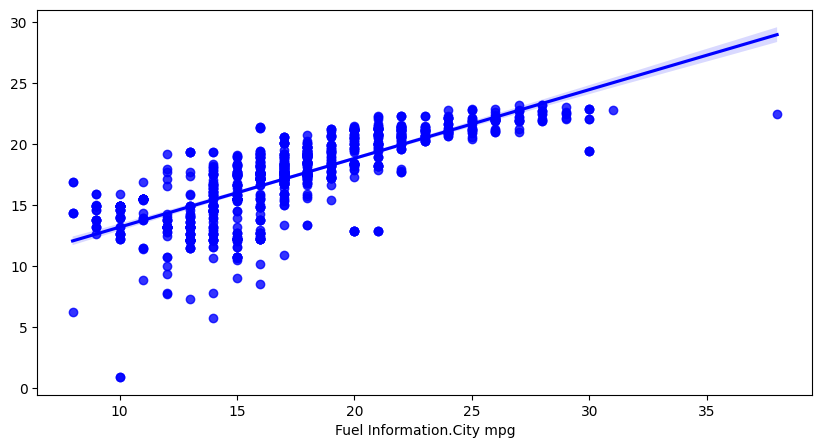

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x=Y_city_test, y=y_city_pred, label='City MPG', color='blue')

<Axes: xlabel='Fuel Information.Highway mpg'>

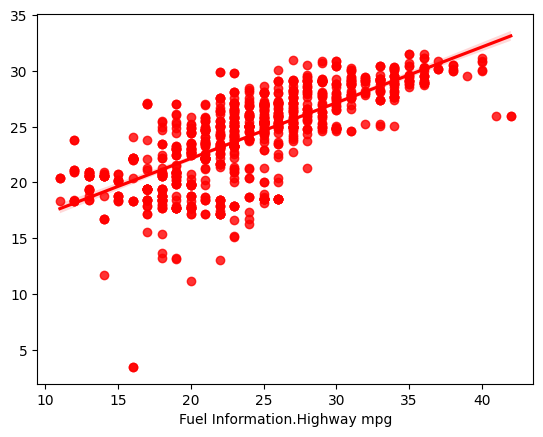

In [ ]:
sns.regplot(x=Y_highway_test, y=y_highway_pred, label='Highway MPG', color='red')

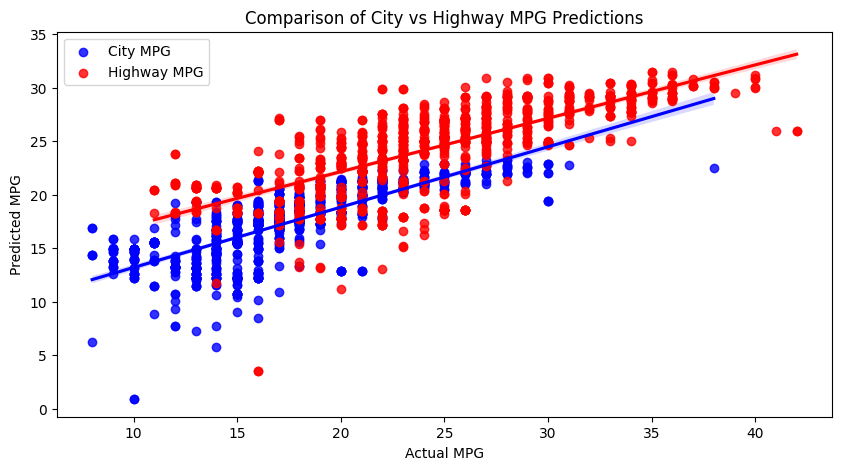

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x=Y_city_test, y=y_city_pred, label='City MPG', color='blue')
sns.regplot(x=Y_highway_test, y=y_highway_pred, label='Highway MPG', color='red')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.legend()
plt.title("Comparison of City vs Highway MPG Predictions")
plt.show()


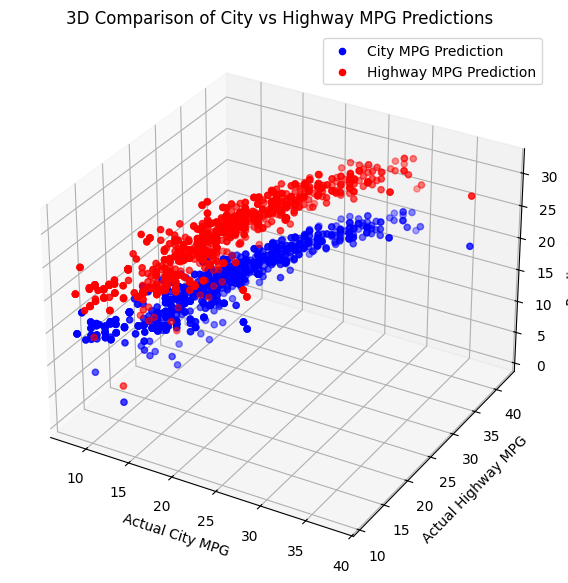

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y_city_test, Y_highway_test, y_city_pred, label='City MPG Prediction', color='blue')
ax.scatter(Y_city_test, Y_highway_test, y_highway_pred, label='Highway MPG Prediction', color='red')
ax.set_xlabel("Actual City MPG")
ax.set_ylabel("Actual Highway MPG")
ax.set_zlabel("Predicted MPG")
ax.set_title("3D Comparison of City vs Highway MPG Predictions")
ax.legend()
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [ ]:
X = df[[
    "Engine Information.Number of Forward Gears",
    "Engine Information.Engine Statistics.Horsepower",
    "Engine Information.Engine Statistics.Torque"
]]
Y_city = df["Fuel Information.City mpg"]
Y_highway = df["Fuel Information.Highway mpg"]

In [ ]:
X_train, X_test, Y_city_train, Y_city_test = train_test_split(X, Y_city, test_size=0.2, random_state=42)
X_train, X_test, Y_highway_train, Y_highway_test = train_test_split(X, Y_highway, test_size=0.2, random_state=42)

In [ ]:
model_city = LinearRegression()
model_highway = LinearRegression()
model_city.fit(X_train, Y_city_train)
model_highway.fit(X_train, Y_highway_train)

LinearRegression()

In [ ]:
y_city_pred = model_city.predict(X_test)
y_highway_pred = model_highway.predict(X_test)

In [ ]:
mse_city = mean_squared_error(Y_city_test, y_city_pred)
r2_city = r2_score(Y_city_test, y_city_pred)
mse_highway = mean_squared_error(Y_highway_test, y_highway_pred)
r2_highway = r2_score(Y_highway_test, y_highway_pred)
print("City MPG - Mean Squared Error:", mse_city)
print("City MPG - R-squared Score:", r2_city)
print("Highway MPG - Mean Squared Error:", mse_highway)
print("Highway MPG - R-squared Score:", r2_highway)

City MPG - Mean Squared Error: 6.690954058138952
City MPG - R-squared Score: 0.6241757490205926
Highway MPG - Mean Squared Error: 13.492385434740077
Highway MPG - R-squared Score: 0.5715478031724032


<Axes: xlabel='Fuel Information.City mpg'>

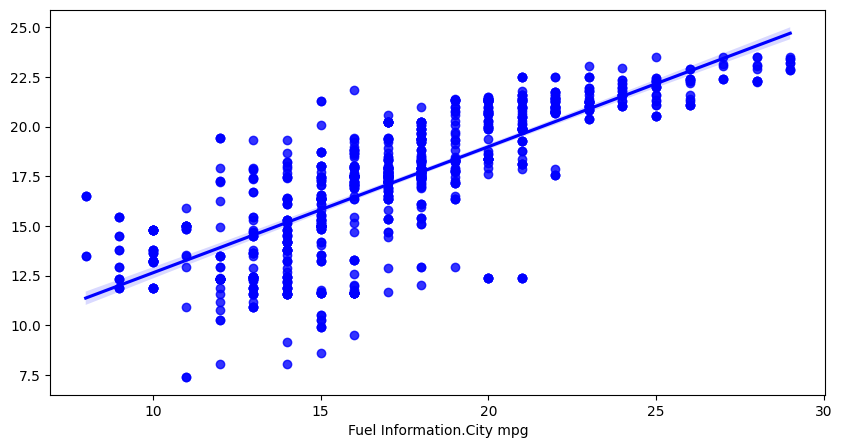

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x=Y_city_test, y=y_city_pred, label='City MPG', color='blue')

<Axes: xlabel='Fuel Information.Highway mpg'>

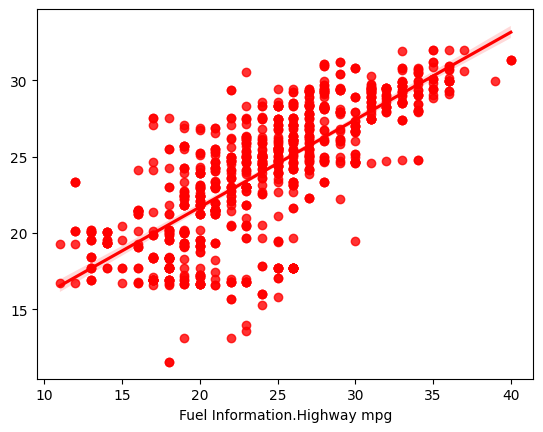

In [ ]:
sns.regplot(x=Y_highway_test, y=y_highway_pred, label='Highway MPG', color='red')

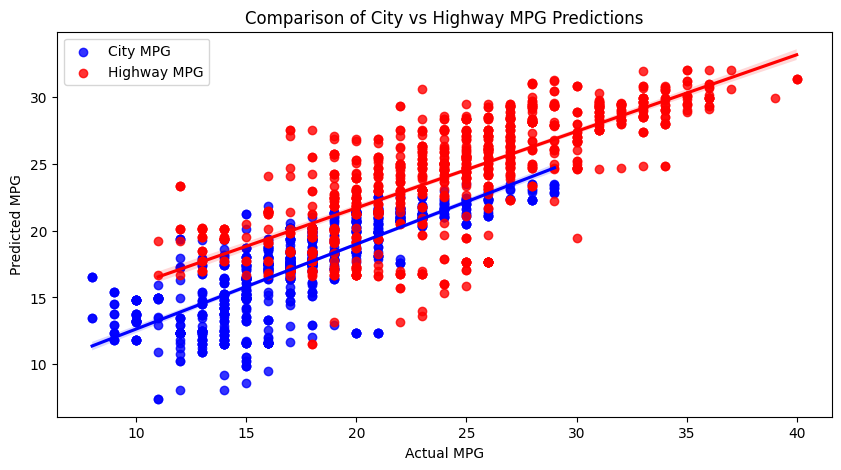

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x=Y_city_test, y=y_city_pred, label='City MPG', color='blue')
sns.regplot(x=Y_highway_test, y=y_highway_pred, label='Highway MPG', color='red')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.legend()
plt.title("Comparison of City vs Highway MPG Predictions")
plt.show()

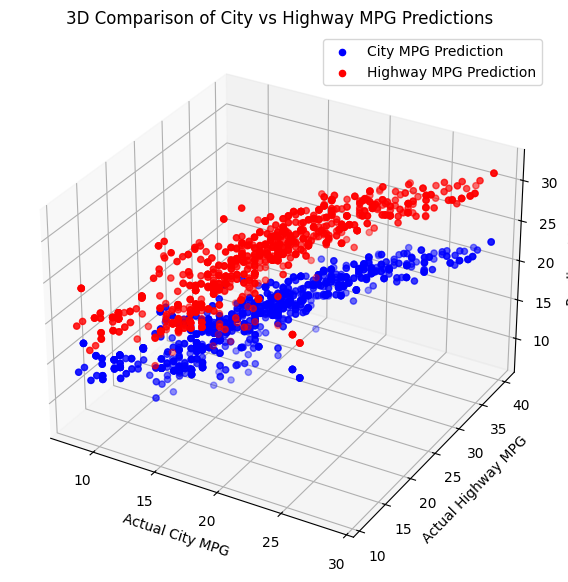

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y_city_test, Y_highway_test, y_city_pred, label='City MPG Prediction', color='blue')
ax.scatter(Y_city_test, Y_highway_test, y_highway_pred, label='Highway MPG Prediction', color='red')
ax.set_xlabel("Actual City MPG")
ax.set_ylabel("Actual Highway MPG")
ax.set_zlabel("Predicted MPG")
ax.set_title("3D Comparison of City vs Highway MPG Predictions")
ax.legend()
plt.show()